## Diffraction des rayons X par un cristal
La diffraction des rayons X est une technique utilisée pour analyser la structure cristalline des matériaux. Lorsqu'un faisceau de rayons X frappe un matériau cristallin, il est diffracté suivant des angles spécifiques qui dépendent de la structure du cristal.

La relation entre l'angle de diffraction et la distance inter-réticulaire est donnée par la loi de Bragg :

$$ n\lambda = 2d\sin\theta $$

où :
- n est un entier (ordre de diffraction),
- $\lambda$  est la longueur d'onde des rayons X utilisés,
- d est la distance entre les plans cristallins,
- $\theta$ est l'angle de diffraction.

Cette technique permet de déterminer la structure cristallographique des matériaux.

In [38]:
import numpy as np
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.structure import Structure
from mp_api.client import MPRester
import matplotlib.pyplot as plt


## Chargement de la structure cristalline
Nous utilisons ici **Materials Project** pour récupérer la structure cristalline d'un matériau donné.

In [39]:
mp_key = "fShF0m8lEepeLAjHYRHR50cMgpJGq7yr"
mp_id = "mp-16763"
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Calcul du diffractogramme
Avec la structure récupérée, nous utilisons le module `XRDCalculator` de **pymatgen** pour calculer le spectre de diffraction des rayons X du matériau sélectionné.

Le spectre est calculé pour un intervalle d'angles $2\theta$ allant de 0° à 90°.

In [40]:
lambda_RX =  1.54060 
xrd_calculator = XRDCalculator(wavelength=lambda_RX)
diffraction_pattern = xrd_calculator.get_pattern(structure, two_theta_range=(0, 90))

## Analyse des trois premiers pics de diffraction
Dans cette section, nous extrayons les **trois premiers pics** du spectre de diffraction.

Chaque pic est défini par :
- **L'angle $2\theta$** : position du pic,
- **L'intensité** : quantité de rayon diffractés dans cette direction,
- **Les indices de Miller (hkl)** : caractérisent le plan cristallin responsable de la diffraction.


In [41]:
two_theta_vals = diffraction_pattern.x
intensities = diffraction_pattern.y
hkl_indices = diffraction_pattern.hkls

print("Trois premiers pics:")
for i in range(3):
    print(f"2θ: {two_theta_vals[i]:.2f}°, intensity: {intensities[i]}, hkl: {hkl_indices[i]}")


Trois premiers pics:
2θ: 10.82°, intensity: 25.160538579425065, hkl: [{'hkl': (1, 1, 1), 'multiplicity': 2}]
2θ: 21.75°, intensity: 2.9377759489268773, hkl: [{'hkl': (2, 2, 2), 'multiplicity': 2}]
2θ: 23.11°, intensity: 0.9105259866293605, hkl: [{'hkl': (1, 0, 0), 'multiplicity': 6}]


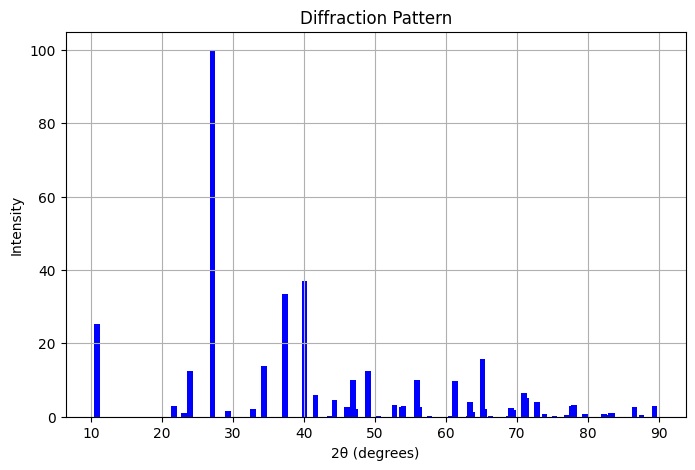

In [43]:
# Création du graphique
plt.figure(figsize=(8, 5))
plt.bar(two_theta_vals, intensities, color='blue')

plt.xlabel("2θ (degrees)")
plt.ylabel("Intensity")
plt.title("Diffraction Pattern")
plt.grid()
plt.show()